In [185]:
import pandas as pd
import nltk
import unicodedata
import re
from nltk.corpus import stopwords
import os
# stopwords = set(STOPWORDS)
# extra_stopwords = ['guardian', 'news', 'theguardian.com', 'say', 'said', 'article', '·', '-']
# stopwords.update(extra_stopwords)
# print(stopwords)

def filter_and_save_data(df, start_date, end_date, section_names, output_file_path):
    """
    Filter data based on specified date range and partial name, and save to specified path.

    Args:
    - df: DataFrame
    - start_date: start 'YYYY-MM-DD'
    - end_date: end 'YYYY-MM-DD'
    - section_name:
    - output_file_path:
    """
    # Convert date column to datetime format
    df['webPublicationDate'] = pd.to_datetime(df['webPublicationDate'])

    # Filter data
    filtered_df = df[(df['webPublicationDate'] >= start_date) & (df['webPublicationDate'] <= end_date) & (df['sectionName'].isin(section_names))]

    # Remove rows with missing content
    filtered_df = filtered_df.dropna(subset=['Tweet'])

    # Ensure the directory exists
    os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

    # save data
    filtered_df.to_csv(output_file_path, index=False)

    print("Filtered data has been saved to:", output_file_path)


def calculate_avg_length(texts):
    total_length = sum(len(text) for text in texts)
    avg_length = total_length / len(texts)
    print("Average length of bodyContent:", avg_length)
    return avg_length

# nltk.download('wordnet')
# nltk.download('stopwords')

def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()

    stop_words = set(stopwords.words('english'))


    extra_stop_words = [
        'guardian', 'article', 'theguardian', 'com', 'says', 'said', 'just', 'like', 'can', 'one', 'also',
        'year', 'years', 'time', 'times', 'world', 'make', 'makes', 'made', 'know', 'known', 'go','south',
        'going', 'get', 'getting', 'got', 'see', 'seeing', 'seen', 'may', 'might', 'week', 'weeks', 'month', 'months',
        'use', 'used', 'using', 'think', 'thinks', 'thought', 'take', 'takes', 'took', 'come', 'comes', 'came',
        'way', 'ways', 'many', 'much', 'news', 'report', 'including', 'use', 'good', 'bad', 'look', 'looks',
        'looking', 'help', 'want', 'wants', 'wanted', 'need', 'needs', 'needed', 'important', 'lot', 'lots', 'tell',
        'tells', 'told', 'work', 'works', 'worked', 'place', 'places', 'point', 'points', 'number', 'numbers',
        'group', 'groups', 'man', 'men', 'woman', 'women', 'child', 'children', 'company', 'companies', 'zealand',
        'york','prime','minster','federal','government','scott','morrison','wale','police','officer','boris','johnson','donald','trump','young','climate','downing','street','united','state','black',
        'chancellor','rishi','sunak','england','home','secretary','priti','fossil','fuel','industry','school','meal','kenan','malik','observer',
        'criminal','justice','system','matt','hancock','green','deal','greenhouse','gas','emission','george','w','bush','office','torres','strait','islander','u','supreme','court','university',
        'california','berkeley','top','story','every','morning','sign','receive','email','national','emmanuel','macron','von','der','leyen',
        'president','youve','read','today','letter','please','considered'
    ]

    stop_words.update(extra_stop_words)


    stop_words.update(extra_stop_words)
    # stop_words = set(stopwords.words('english')) #+ ['guardian', 'news', 'theguardian.com', 'say', 'said', 'article', '·', '-']
    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stop_words]



In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
def plot_ngrams(words, n=2, top=15, color='green'):
    dataset_name = words.name if hasattr(words, 'name') else 'Dataset'
    ngrams_series = pd.Series(nltk.ngrams(words, n)).value_counts()[:top]

    # plot
    plt.figure(figsize=(10, 6))
    ngrams_series.sort_values().plot.barh(color=color, width=0.9)
    plt.title(f'Top {top} {n}-grams in {dataset_name}')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-gram')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

def extract_specific_quarter_data(df, start_date, end_date):
    """
    Extract data from the DataFrame for the specified date range.

    Args:
    - df: DataFrame to extract data from
    - start_date: Start date of the date range (format: 'YYYY-MM-DD')
    - end_date: End date of the date range (format: 'YYYY-MM-DD')

    Returns:
    - DataFrame containing data for the specified date range
    """
    # Convert start_date and end_date to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Remove timezone information from the datetime column
    df['webPublicationDate'] = df['webPublicationDate'].dt.tz_localize(None)

    # Extract data for the specified date range
    return df[(df['webPublicationDate'] >= start_date) & (df['webPublicationDate'] <= end_date)]


def plot_ngrams_for_dataset(data, dataset_name, start_date, end_date, n=[2], top=15, colors=('#00429d', '#ffa600')):
    # Extract data for the specified date range
    quarterly_data = extract_specific_quarter_data(data, start_date, end_date)

    # Clean the data
    quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)
    cleaned_data = clean(''.join(quarterly_data['Tweet']))

    plt.figure(figsize=(15, 16))
    
    # 对于每个n，创建一个子图
    for i, n_val in enumerate(n):
        # 创建子图；调整子图间的垂直间距
        ax = plt.subplot(len(n), 1, i+1)
        
        # 计算n-grams并绘制条形图
        ngrams_series = pd.Series(nltk.ngrams(cleaned_data, n_val)).value_counts()[:top]
        ngrams_series.sort_values().plot.barh(color=colors[i % len(colors)], width=0.5, ax=ax)  
        
        # Set tick parameters without titles
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=20, rotation=45)
        
    # 调整子图布局
    plt.tight_layout(pad=3.0)
    plt.show()
def extract_and_clean_ngrams(data, n, top):
    # 假设 `clean` 函数已经定义，用于数据清洗
    cleaned_data = clean(''.join(data['Tweet']))
    ngrams_series = pd.Series(nltk.ngrams(cleaned_data, n)).value_counts()[:top]
    return ngrams_series.sort_values()
def compare_ngrams_for_datasets(dataset1, name1, dataset2, name2, start_date, end_date, n=2, top=15, colors=('#00429d', '#ffa600')):
    import matplotlib.pyplot as plt
    
    # 提取并清洗两个数据集的n-grams
    ngrams1 = extract_and_clean_ngrams(extract_specific_quarter_data(dataset1, start_date, end_date), n, top)
    ngrams2 = extract_and_clean_ngrams(extract_specific_quarter_data(dataset2, start_date, end_date), n, top)
    
    # 绘制图表
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # 数据合并为DataFrame，准备绘制
    df = pd.DataFrame({
        name1: ngrams1,
        name2: ngrams2
    })
    
    # 绘制barh图
    df.plot.barh(ax=ax, color=colors, width=0.5)
    
    # 设置标题和标签
    ax.set_title(f'Top {top} {n}-grams comparison between {name1} and {name2} ({start_date} to {end_date})', fontsize=18)
    ax.set_xlabel('Frequency', fontsize=14)
    ax.set_ylabel('N-grams', fontsize=14)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

In [48]:
import pandas as pd
import nltk
import unicodedata
#nltk.download('all')
from nltk import word_tokenize, SnowballStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import re
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import calendar
import time

In [49]:
file_path = "/Users/neo/Documents/bert/bert_final2.csv"
df = pd.read_csv(file_path)


sectionName
World news        11269
Opinion            7912
Australia news     5419
Business           4672
Politics           4606
UK news            4255
Name: count, dtype: int64
     Section Name  Count
0      World news  11269
1         Opinion   7912
2  Australia news   5419
3        Business   4672
4        Politics   4606
5         UK news   4255


In [110]:
start_date = '2018-01-01'
end_date = '2022-12-31'
# save world news
world_news_output_file_path = "/Users/neo/Documents/bert/world_news_articles_2018_to_2022.csv"
wsection_names = ['World news']
filter_and_save_data(df, start_date, end_date, wsection_names, world_news_output_file_path)
# save Australia news
au_news_output_file_path = "/Users/neo/Documents/bert/australia_news_articles_2018_to_2022.csv"
ausection_names = ['Australia news']
filter_and_save_data(df, start_date, end_date, ausection_names, au_news_output_file_path)

uk_news_output_file_path = "/Users/neo/Documents/bert/uk_articles_2018_to_2022.csv"
ukn_names = ['UK news']
filter_and_save_data(df, start_date, end_date, ukn_names, uk_news_output_file_path)

opinion_output_file_path = "/Users/neo/Documents/bert/opinion_articles_2018_to_2022.csv"
opinion_names = ['Opinion']
filter_and_save_data(df, start_date, end_date, opinion_names, opinion_output_file_path)

Filtered data has been saved to: /Users/neo/Documents/bert/world_news_articles_2018_to_2022.csv
Filtered data has been saved to: /Users/neo/Documents/bert/australia_news_articles_2018_to_2022.csv
Filtered data has been saved to: /Users/neo/Documents/bert/uk_articles_2018_to_2022.csv
Filtered data has been saved to: /Users/neo/Documents/bert/opinion_articles_2018_to_2022.csv


In [111]:
world_news_df = pd.read_csv("/Users/neo/Documents/bert/world_news_articles_2018_to_2022.csv")
au_news_df = pd.read_csv("/Users/neo/Documents/bert/australia_news_articles_2018_to_2022.csv")
uk_news_df = pd.read_csv("/Users/neo/Documents/bert/uk_articles_2018_to_2022.csv")
opinion_df = pd.read_csv("/Users/neo/Documents/bert/opinion_articles_2018_to_2022.csv")

In [140]:
world_news_df['webPublicationDate'] = pd.to_datetime(world_news_df['webPublicationDate'])
au_news_df['webPublicationDate'] = pd.to_datetime(au_news_df['webPublicationDate'])
uk_news_df['webPublicationDate'] = pd.to_datetime(uk_news_df['webPublicationDate'])
opinion_df['webPublicationDate'] = pd.to_datetime(opinion_df['webPublicationDate'])
df['webPublicationDate'] = pd.to_datetime(df['webPublicationDate'])

world_news_df['Year'] = world_news_df['webPublicationDate'].dt.year
au_news_df['Year'] = au_news_df['webPublicationDate'].dt.year
uk_news_df['Year'] = uk_news_df['webPublicationDate'].dt.year
opinion_df['Year'] = opinion_df['webPublicationDate'].dt.year
df['Year'] = df['webPublicationDate'].dt.year

world_news_2019 = world_news_df[world_news_df['Year'] == 2019]

au_news_2019 = au_news_df[au_news_df['Year'] == 2019]

uk_news_2019 = uk_news_df[uk_news_df['Year'] == 2019]

In [ ]:
for year in range(2020, 2022):
    for quarter in range(1, 5):
        # Calculate the start and end dates of the quarter
        start_month = (quarter - 1) * 3 + 1
        end_month = quarter * 3
        if end_month > 12:
            end_month %= 12
            year += 1
        start_date = f'{year}-{start_month:02d}-01'
        end_date = f'{year}-{end_month:02d}-{calendar.monthrange(year, end_month)[1]:02d}'

        plot_ngrams_for_dataset(world_news_df, f'World News {year} Q{quarter}', start_date, end_date, n=[2, 3], top=10, colors=('green', 'orange'))
        plot_ngrams_for_dataset(au_news_df, f'Australia News {year} Q{quarter}', start_date, end_date, n=[2, 3], top=10, colors=('blue', 'purple'))
        plot_ngrams_for_dataset(uk_news_df, f'UK News {year} Q{quarter}', start_date, end_date, n=[2, 3], top=10,colors=('red', 'yellow'))

        # Add a delay to wait for some time before sending the next request
        time.sleep(1)

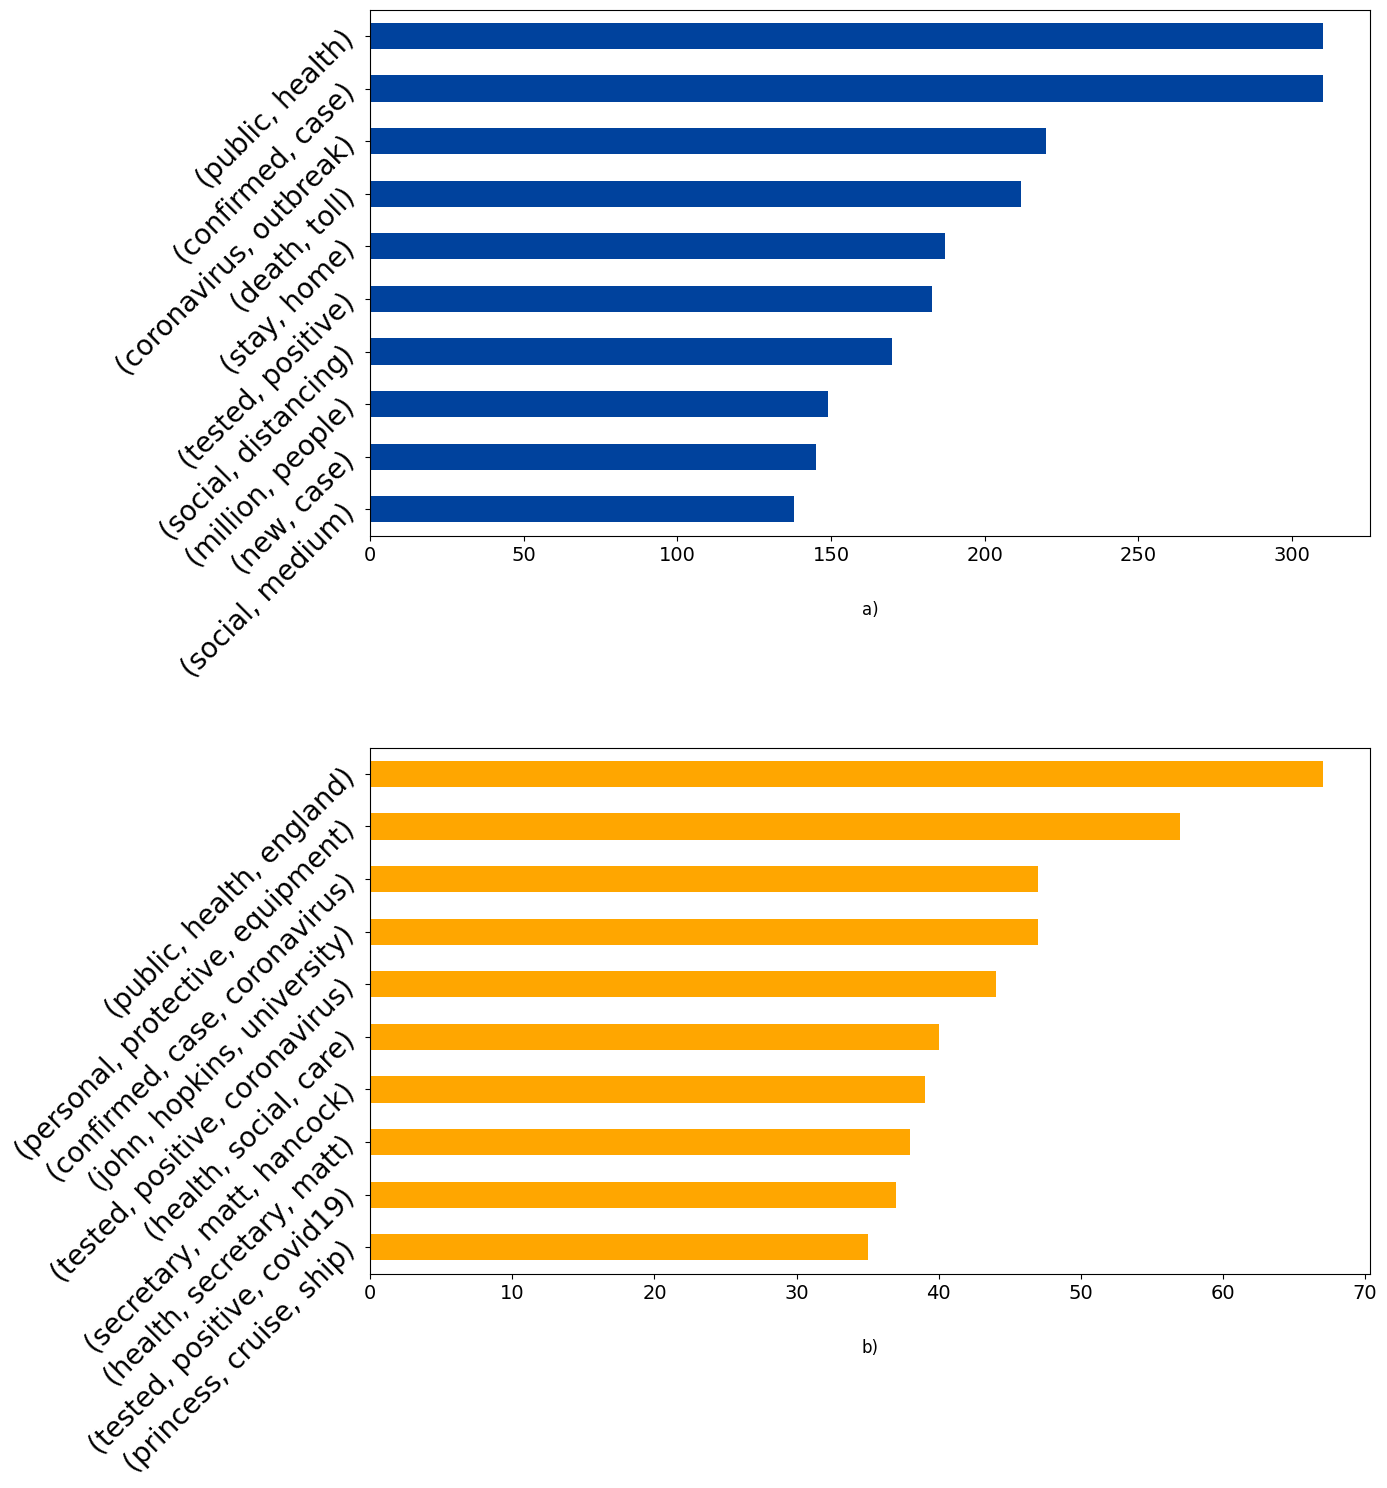

In [108]:
plot_ngrams_for_dataset(world_news_df, 'World News 2020', '2020-01-01', '2020-03-31', n=[2, 3], top=10, colors=('#00429d', '#ffa600'))

In [192]:
def plot_trigrams(data, dataset_name, start_date, end_date, top=15, color='#ffa600'):
    # Filter rows where any specified emotional state is 1
    filtered_data = data[(data['Denial'] == 1) | (data['Annoyed'] == 1) | (data['Anxious'] == 1) | (data['Sad'] == 1)]
    
    # Extract data for the specified date range
    quarterly_data = extract_specific_quarter_data(filtered_data, start_date, end_date)

    # Clean and concatenate tweet data
    quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)
    cleaned_data = clean(''.join(quarterly_data['Tweet']))

    # Calculate trigrams
    trigrams_series = pd.Series(nltk.ngrams(cleaned_data, 3)).value_counts()[:top]

    # Plot trigrams
    plt.figure(figsize=(15, 8))
    trigrams_series.sort_values().plot.barh(color=color, width=0.5)
    plt.yticks(fontsize=20)  # Enlarged font size for y-axis labels
    plt.tight_layout(pad=3.0)
    plt.show()

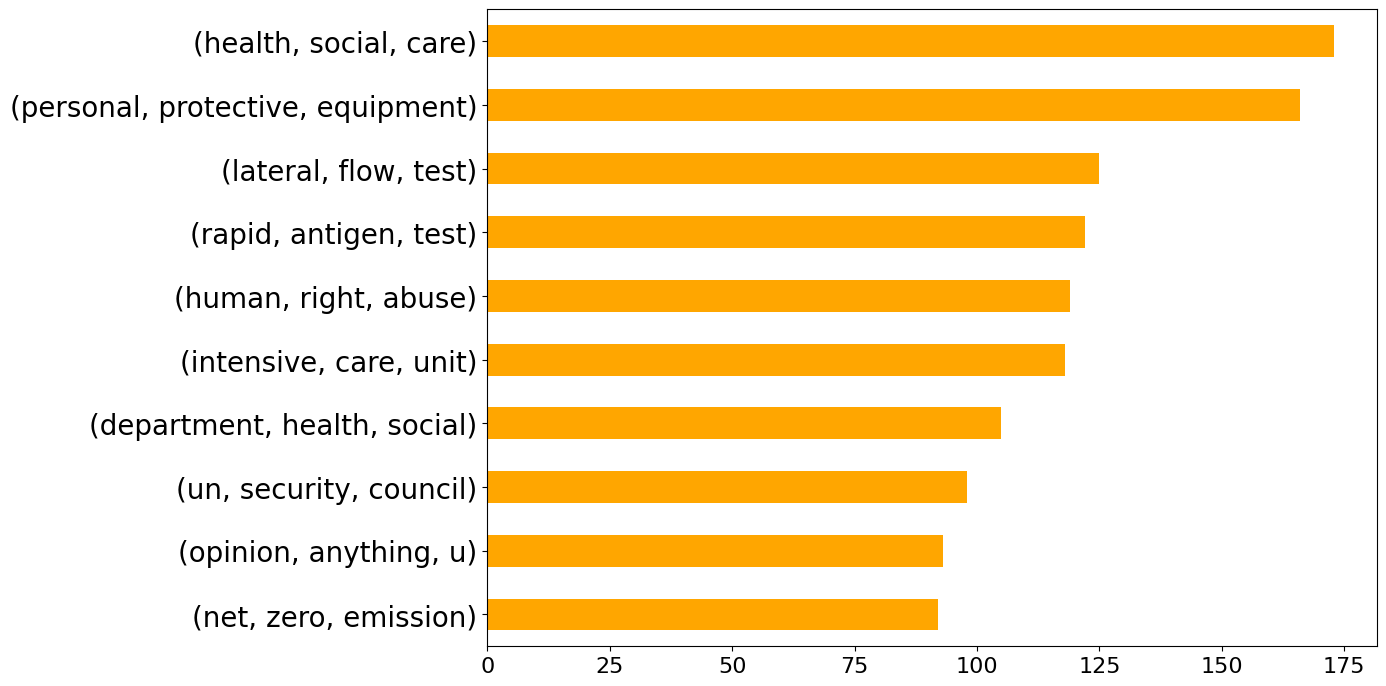

In [193]:
plot_trigrams(df, 'ALL', '2019-12-31', '2022-03-31', top=10)

In [164]:
sections = ['World news', 'UK news', 'Australia news', 'Opinion']
df = df[df['sectionName'].isin(sections)]
df

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Official report,Joking,webPublicationDate,sectionName,Year
1,Twenty-two school children on their way to sta...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,World news,2018
3,The former prime minister Kevin Rudd is suing ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Australia news,2018
6,Labor rightwingers determined to execute a pow...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2018-01-31,Australia news,2018
7,Parliament is expected to relocate away from i...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,UK news,2018
9,"Good morning, this is Eleanor Ainge Roy bringi...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018-01-31,Australia news,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,Top story: ‘They want to raze it to the ground...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2022-03-23,World news,2022
38129,A Russian couple who staged a solitary protest...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,UK news,2022
38130,All big experiences in our lives have two real...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-23,Opinion,2022
38131,"Until the Russian invasion of Ukraine, Hungary...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2022-03-23,World news,2022


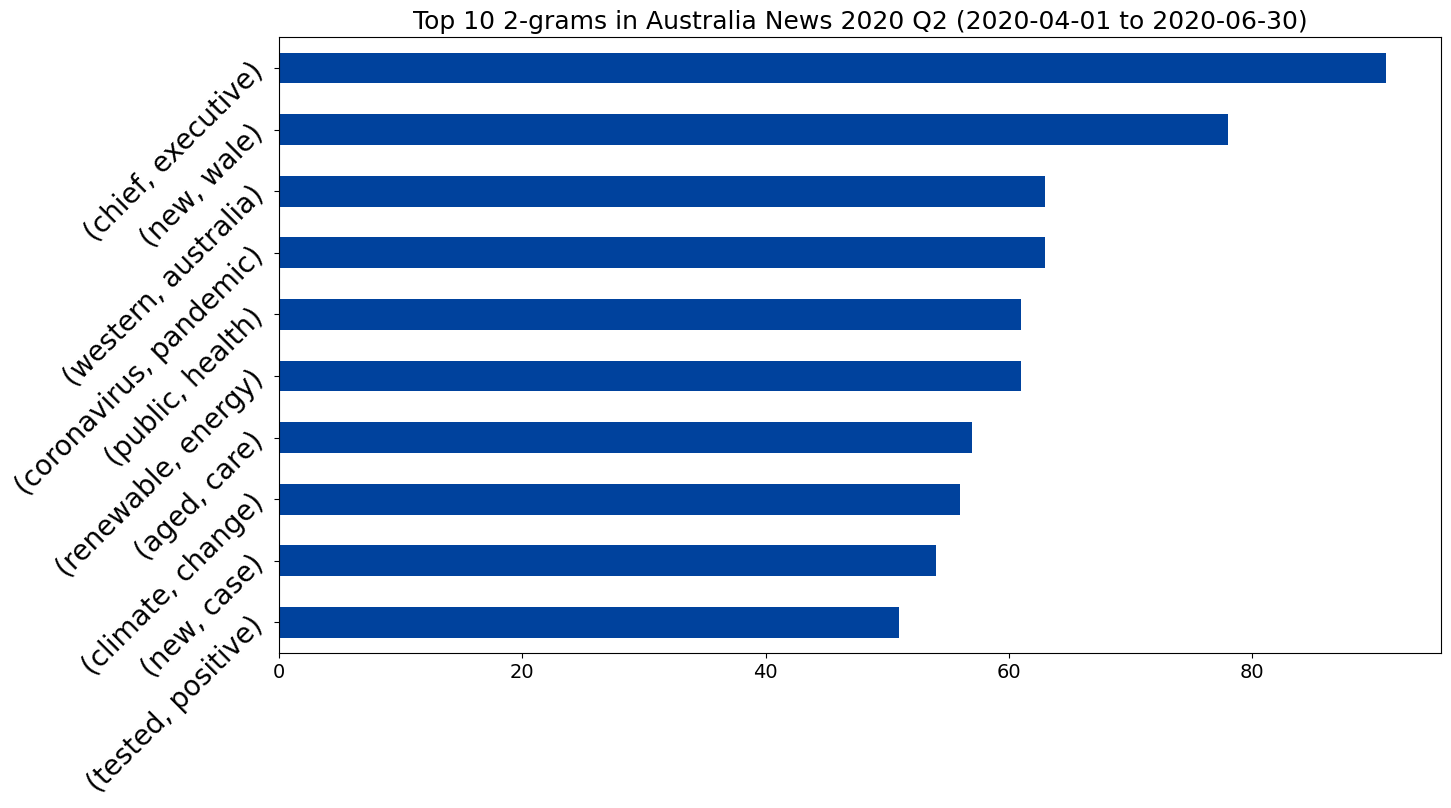

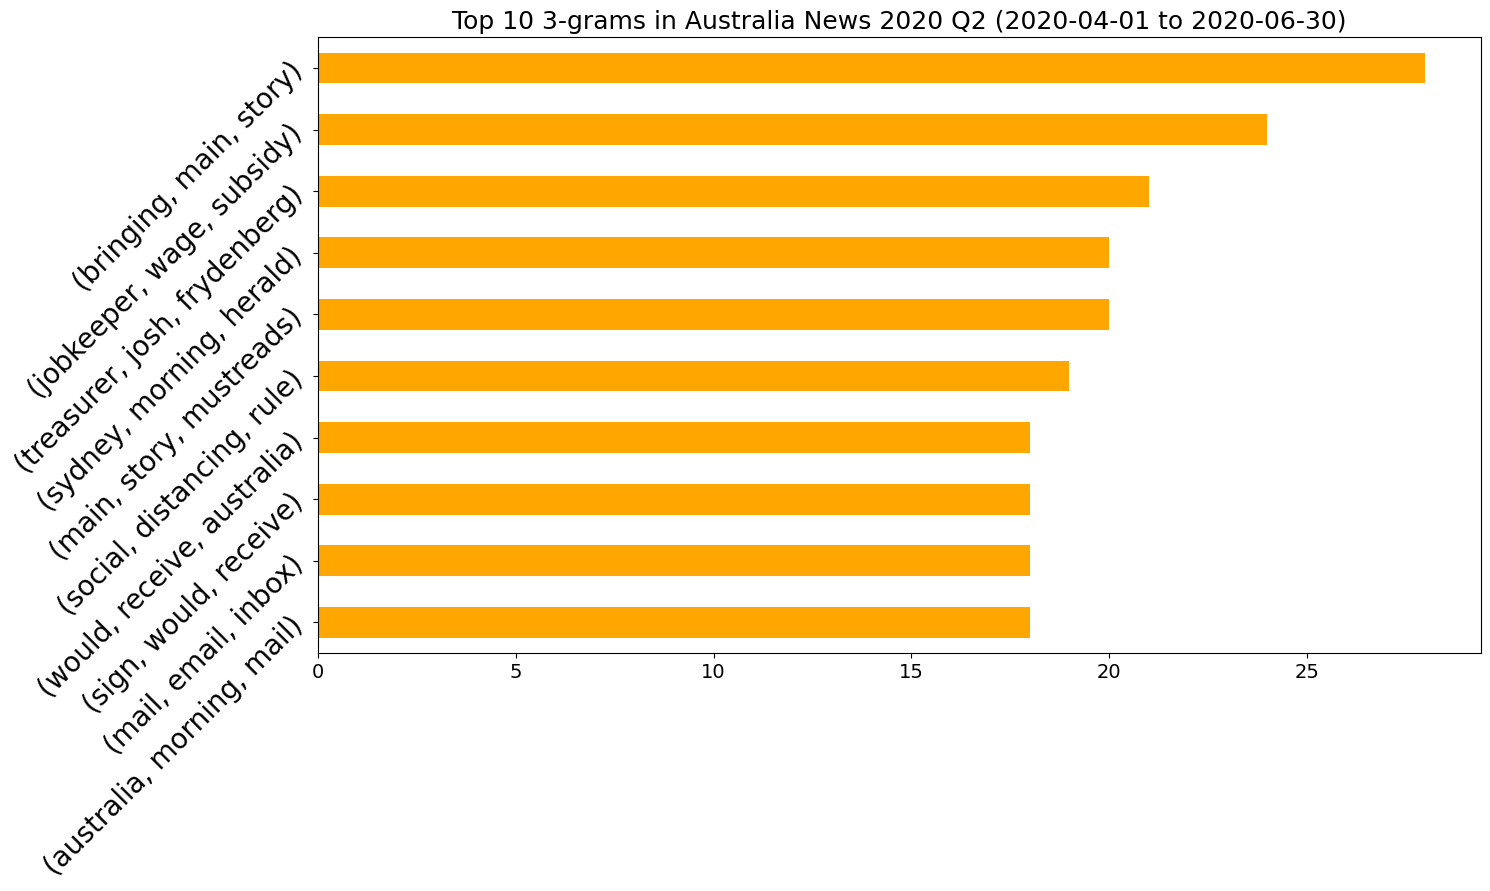

In [94]:
plot_ngrams_for_dataset(au_news_df, 'Australia News 2020 Q2', '2020-04-01', '2020-06-30', n=[2, 3], top=10, colors=('#00429d', '#ffa600'))

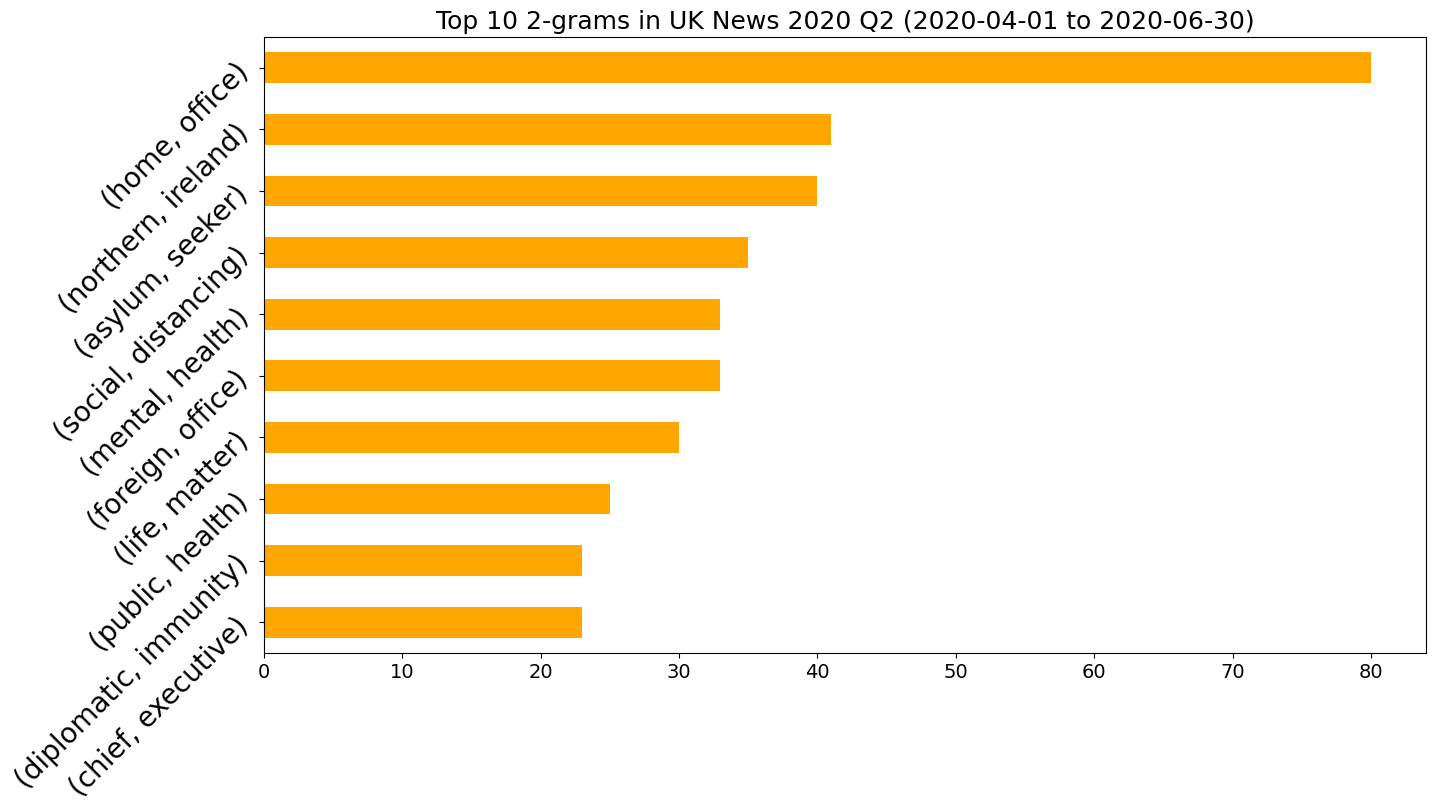

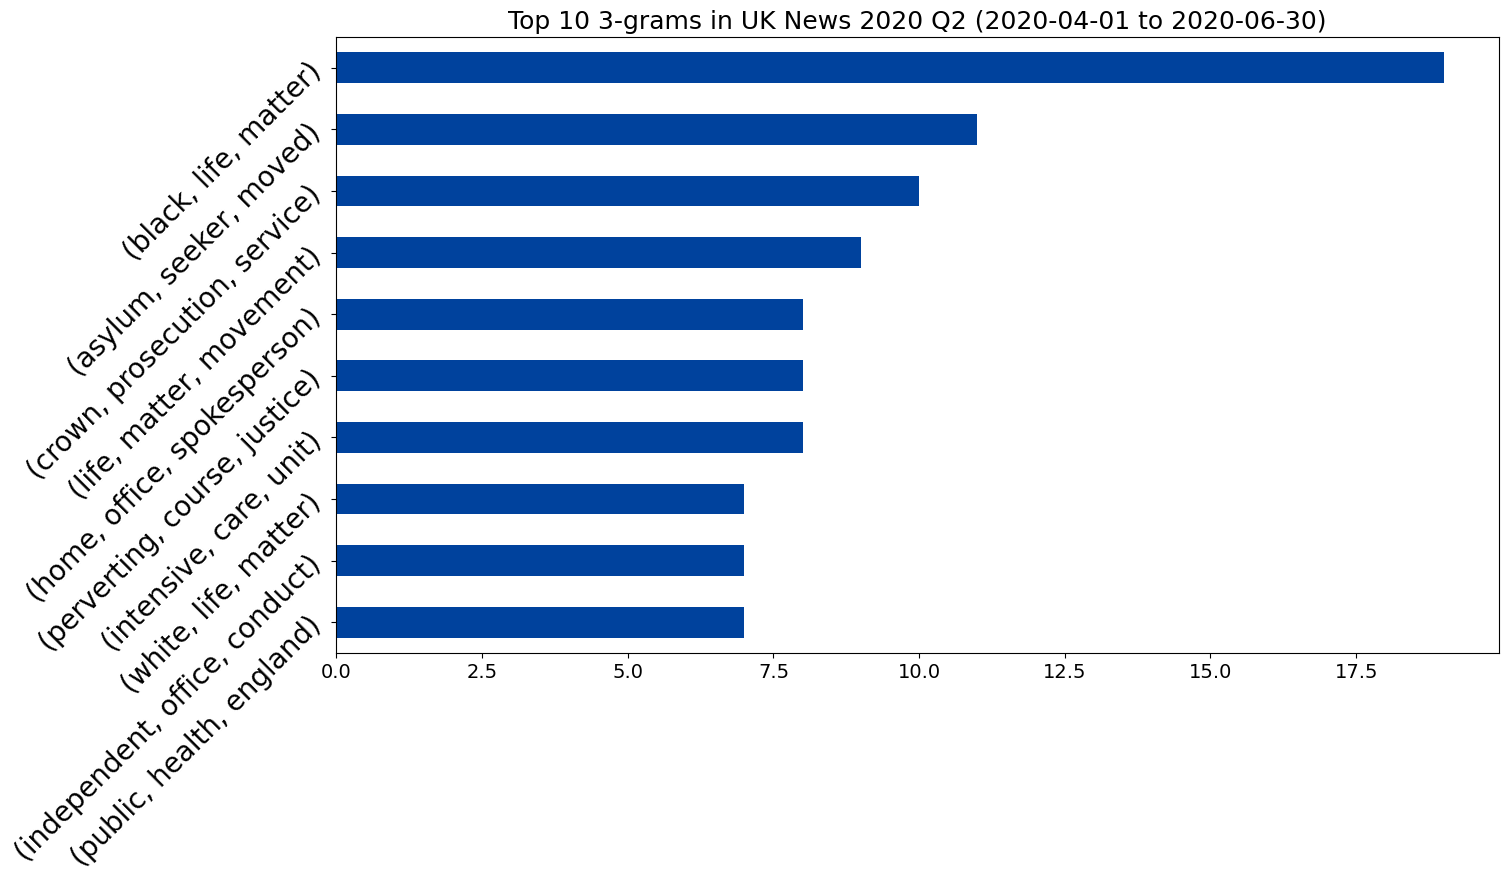

In [96]:
plot_ngrams_for_dataset(uk_news_df, 'UK News 2020 Q2', '2020-04-01', '2020-06-30', n=[2, 3], top=10, colors=('#ffa600','#00429d'))

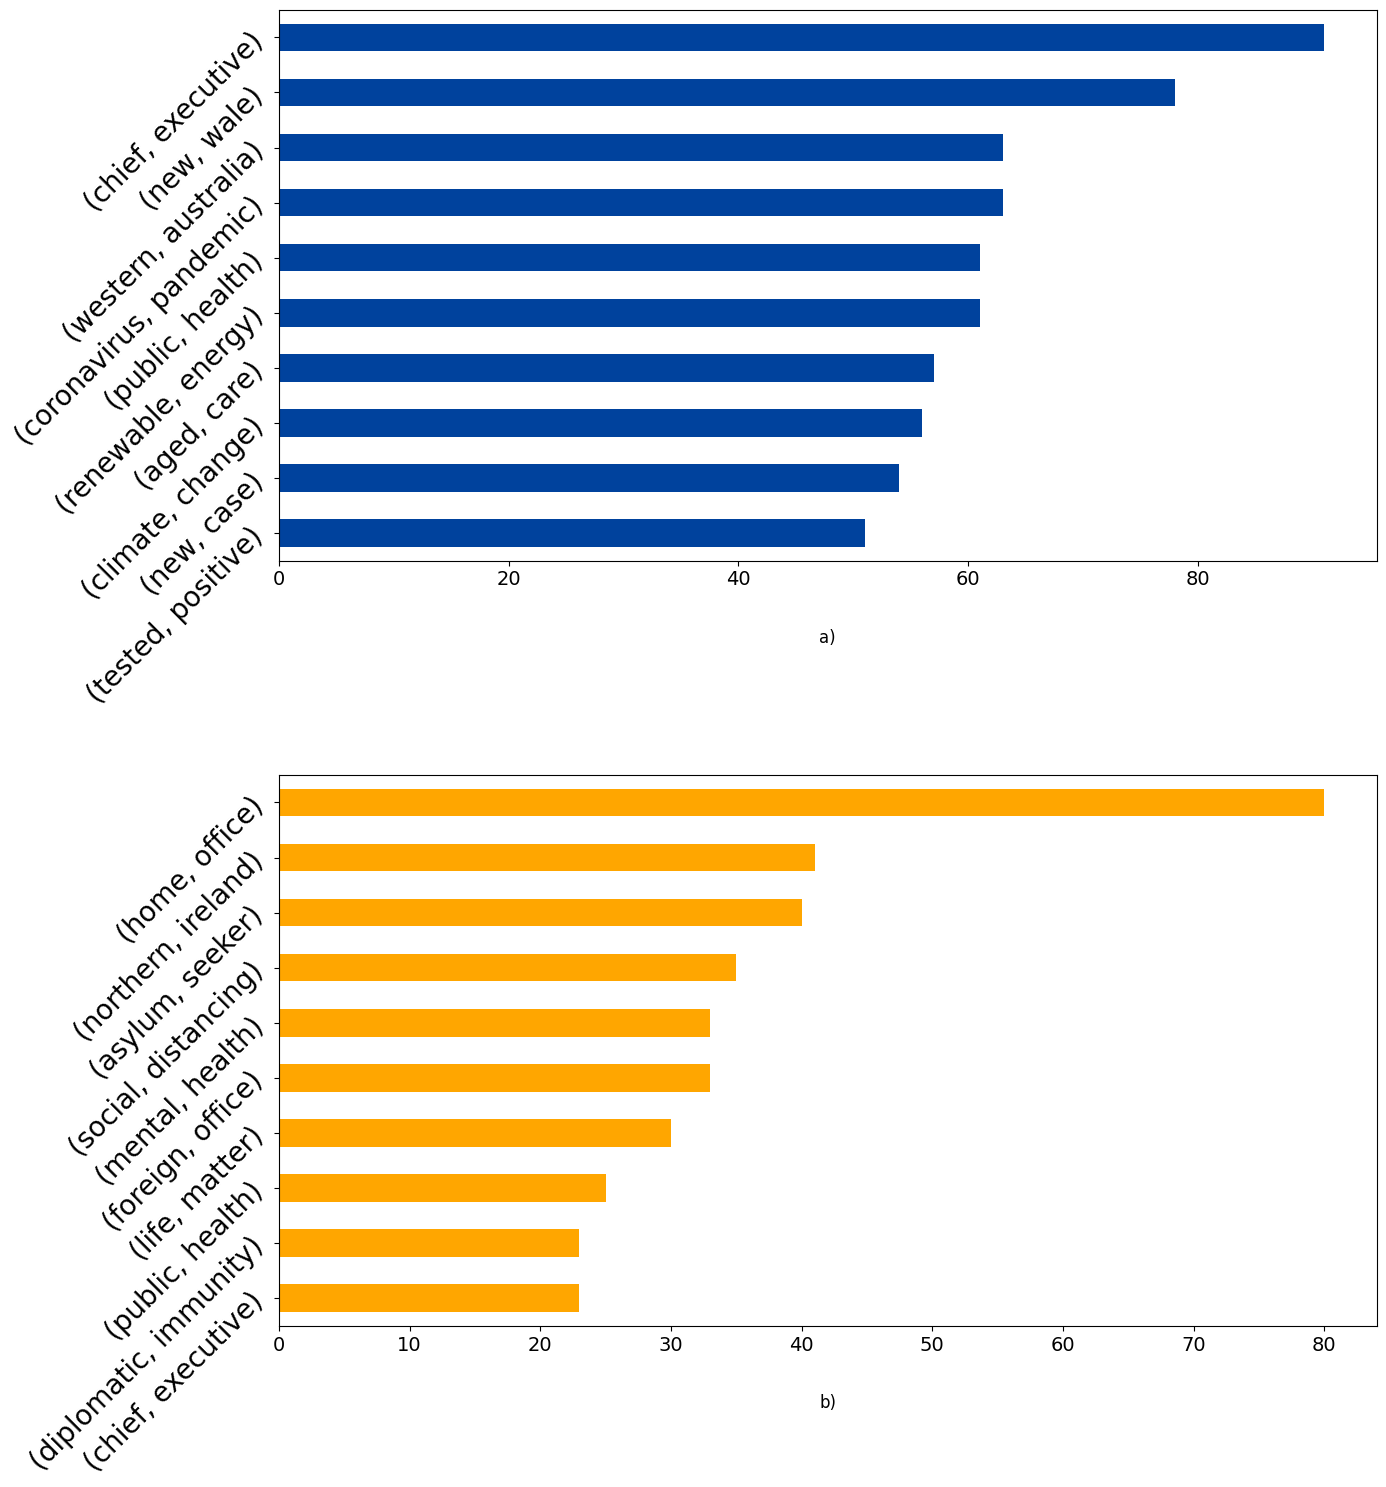

In [109]:
def plot_ngrams_for_two_datasets(data1, dataset_name1, data2, dataset_name2, start_date, end_date, n=2, top=15, colors=('#00429d', '#ffa600')):
    # 设置图的总大小
    plt.figure(figsize=(15, 16))
    
    datasets = [(data1, dataset_name1), (data2, dataset_name2)]
    for i, (data, dataset_name) in enumerate(datasets):
        # Extract data for the specified date range
        quarterly_data = extract_specific_quarter_data(data, start_date, end_date)

        # Clean the data
        cleaned_data = clean(''.join(quarterly_data['Tweet']))

        # 计算n-grams并绘制条形图
        ngrams_series = pd.Series(nltk.ngrams(cleaned_data, n)).value_counts()[:top]
        
        # 创建子图；调整子图间的垂直间距
        ax = plt.subplot(2, 1, i+1)
        
        ngrams_series.sort_values().plot.barh(color=colors[i % len(colors)], width=0.5, ax=ax)  
        
        # 不设置标题
        # ax.set_title(f'Top {top} {n}-grams in {dataset_name} ({start_date} to {end_date})', fontsize=18)
        
        # 设置刻度字体大小
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=20, rotation=45)
        
        # 在图下方添加指定的文本
        label = "a)" if i == 0 else "b)"
        plt.text(0.5, -0.15, f'{label}', fontsize=12, ha='center', transform=ax.transAxes)
        
    # 调整子图布局
    plt.tight_layout(pad=3.0)
    plt.show()

# 示例调用
plot_ngrams_for_two_datasets(au_news_df, 'Australia News 2020 Q2', uk_news_df, 'UK News 2020 Q2', '2020-04-01', '2020-06-30', n=2, top=10)